In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

d = np.loadtxt("data/global.dat")
d = d.ravel()

index = pd.date_range(start="1856",periods=len(d),freq="M")
d = pd.Series(d,index=index)
d.head()

1856-01-31   -0.384
1856-02-29   -0.457
1856-03-31   -0.673
1856-04-30   -0.344
1856-05-31   -0.311
Freq: M, dtype: float64

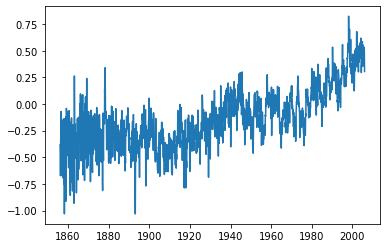

In [7]:
plt.plot(d)

In [10]:
from statsmodels.tsa.api import pacf

pacf(d)

array([ 1.        ,  0.85879703,  0.2950123 ,  0.15208999,  0.1464053 ,
        0.09066943,  0.05684036,  0.08996947,  0.08300459,  0.06785275,
        0.07150456,  0.00189836,  0.03674816,  0.02425977, -0.0346288 ,
       -0.04463978, -0.03568776,  0.03969543,  0.02328174,  0.04470935,
        0.00874648,  0.0676749 ,  0.06812027,  0.09095384,  0.11612892,
       -0.02797687, -0.02152715, -0.03631295, -0.0147586 , -0.01859356,
        0.05388191, -0.01266624,  0.03737551,  0.01401046,  0.01686325,
        0.05292828,  0.09076273, -0.01337506,  0.03909716,  0.00644535,
       -0.0419518 ])

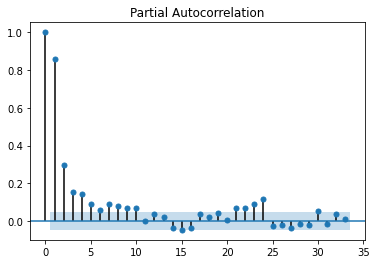

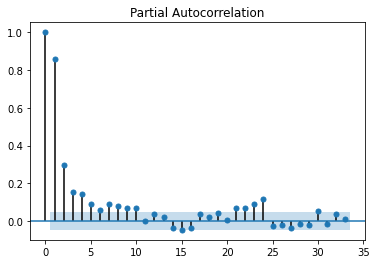

In [11]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(d)

In [28]:
from statsmodels.tsa.ar_model import ar_select_order


sel = ar_select_order(d,20)
sel.ar_lags

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [22]:
fit = sel.model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                      y   No. Observations:                 1800
Model:                    AutoReg(10)   Log Likelihood                1146.109
Method:               Conditional MLE   S.D. of innovations              0.128
Date:                Mon, 29 Jun 2020   AIC                             -4.105
Time:                        10:24:33   BIC                             -4.068
Sample:                    11-30-1856   HQIC                            -4.091
                         - 12-31-2005                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0039      0.003     -1.132      0.258      -0.011       0.003
y.L1           0.4841      0.024     20.535      0.000       0.438       0.530
y.L2           0.1455      0.026      5.556      0.000       0.094       0.197
y.L3           0.0444      0.026      1.681      0.093      -0.007       0.096
y.L4           0.0753      0.026      2.851      0.004       0.024       0.127
y.L5           0.0365      0.026      1.382      0.167      -0.015       0.088
y.L6          -0.0117      0.026     -0.443      0.658      -0.064       0.040
y.L7           0.0338      0.026      1.283      0.199      -0.018       0.086
y.L8           0.0385      0.026      1.465      0.143      -0.013       0.090
y.L9           0.0367      0.026      1.406      0.160      -0.014       0.088
y.L10          0.0785      0.024      3.335      0.001       0.032       0.125
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1             1.0125           -0.0000j            1.0125           -0.0000
AR.2             1.0249           -0.6820j            1.2311           -0.0935
AR.3             1.0249           +0.6820j            1.2311            0.0935
AR.4             0.3998           -1.2514j            1.3137           -0.2008
AR.5             0.3998           +1.2514j            1.3137            0.2008
AR.6            -1.3813           -0.0000j            1.3813           -0.5000
AR.7            -1.1021           -0.7842j            1.3527           -0.4016
AR.8            -1.1021           +0.7842j            1.3527            0.4016
AR.9            -0.3719           -1.3287j            1.3798           -0.2934
AR.10           -0.3719           +1.3287j            1.3798            0.2934
------------------------------------------------------------------------------
"""

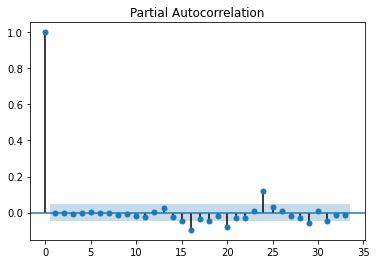

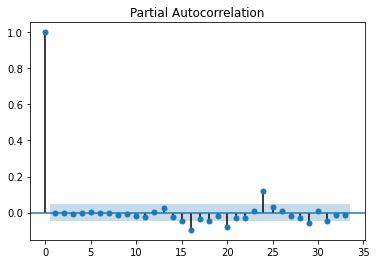

In [29]:
plot_pacf(fit.resid)